In [1]:
# RF to predict tti or log tti or ahd from all other data
# use households until find pop
# dimensionality reduction?

# factorsd impacting congestion, networks, tti, modeshares

# tti website has other papers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

In [3]:
#cfc = pd.read_csv('../../data/tidy/msa-carbon-footprint.csv')
trf = pd.read_csv('../../data/tidy/tti-traffic.csv')
net = pd.read_csv('../../data/tidy/data-aggregation-networkstats.csv')
inc = pd.read_csv('../../data/tidy/data-aggregation-income.csv')
mod = pd.read_csv('../../data/tidy/data-aggregation-ms.csv')
unemp = pd.read_csv('../../data/tidy/acs-unemp.csv')

In [4]:
#ahd_list = df['ahd'].tolist()
 
# show the list
#print(ahd_list)

In [5]:
net1 = net.dropna()

In [6]:
net.isna().sum().sum()

0

In [7]:
df = inc.merge(mod, left_on='msa', right_on='msa', how='left')

In [8]:
df.head()

,msa,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh
0,"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081
1,"Aguadilla-Isabela, PR",109620,15681,0.841606,0.083801,0.003571,0.003961,0.001870,0.042219,0.022973
2,"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080
3,"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567
4,"Albany, OR",44942,44965,0.773648,0.112044,0.005838,0.011126,0.013241,0.023035,0.061067


In [9]:
df = df.merge(trf, left_on='msa', right_on='msa', how='left')

In [10]:
df = df.merge(unemp, left_on = 'msa', right_on = 'msa', how = 'left')

In [11]:
df = df.merge(net1, left_on = 'msa', right_on = 'msa', how = 'left')

In [12]:
df = df.dropna(subset=['tti', 'street_length_avg'])

df['log_tti'] = np.log10(df['tti'])

In [13]:
df.head()

,msa,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,...,street_length_avg,circuity_avg,self_loop_proportion,node_density_km,intersection_density_km,edge_density_km,street_density_km,builing_area_sqkm,area_sqkm,log_tti
0,"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,...,433.147439,1.067840,0.004465,2.012523,1.669790,2406.696840,1251.142264,7.048505,7133.829924,0.025306
2,"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,...,217.395754,1.056240,0.015089,11.231303,8.862967,6351.230011,3360.943838,14.307097,2391.975398,0.045323
3,"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,...,417.399446,1.052833,0.002928,2.028965,1.667318,2287.583389,1195.808038,6.979580,4172.570196,0.029384
6,"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,...,290.921216,1.089403,0.003762,2.336804,1.791798,1738.064896,924.912213,75.879548,24078.610478,0.060698
9,"Altoona, PA",50948,43871,0.825278,0.092571,0.003603,0.013739,0.001307,0.036820,0.026683,...,237.026234,1.077541,0.003747,5.408914,4.134118,3299.511213,1760.200074,2.214895,1365.708425,0.021189


In [14]:
df = df.set_index('msa')

In [15]:
from pathlib import Path  
filepath = Path('../../data/tidy/congestion-exploration.csv', index = False)  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

In [16]:
rf = RandomForestRegressor(max_features= 7, n_estimators=2000, random_state=0, max_depth = 10 ) #ccp_alpha=0.1
X = df.drop(columns=['tti','log_tti','dvmt_freeway', 'vmt_arterial'])
Y = (df['log_tti'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred


array([0.04274428, 0.03125507, 0.0256013 , 0.05663379, 0.06746518,
       0.02949788, 0.03980802, 0.03867527, 0.02840804, 0.03396203,
       0.05143292, 0.06361439, 0.03418994, 0.02802516, 0.04100471,
       0.03513166, 0.03368896, 0.03191867, 0.04210229, 0.05246142,
       0.03713446, 0.05632819, 0.02657456, 0.04564199, 0.04135718,
       0.02712006, 0.05099007, 0.04247609, 0.03925825, 0.03855592,
       0.0322713 ])

In [17]:
y_pred_train = rf.predict(X_train)
y_pred_train

array([0.02803786, 0.03874898, 0.02430574, 0.02916395, 0.05299648,
       0.03170856, 0.03459374, 0.03418314, 0.06240446, 0.06238426,
       0.07076869, 0.02483632, 0.02359171, 0.04137978, 0.03719043,
       0.0197655 , 0.04367509, 0.02946923, 0.03979296, 0.02358728,
       0.03972057, 0.03349363, 0.0339857 , 0.02458455, 0.04277237,
       0.06027369, 0.02979968, 0.03659947, 0.02474412, 0.04344001,
       0.02696716, 0.02988668, 0.04298534, 0.04281334, 0.02983108,
       0.03922789, 0.03216624, 0.02791649, 0.02855845, 0.0380705 ,
       0.05271533, 0.07063029, 0.05273763, 0.03826535, 0.05433616,
       0.05921902, 0.05836334, 0.0486172 , 0.05704785, 0.06727846,
       0.0362611 , 0.02272873, 0.04188677, 0.05848051, 0.03877922,
       0.03766561, 0.05396954, 0.03898709, 0.04112525, 0.03779556,
       0.03525492, 0.05186769, 0.06084779, 0.01996259, 0.06147467,
       0.03809372, 0.03351276, 0.02898859, 0.03348228, 0.06897065,
       0.06920069, 0.04693891, 0.04019843, 0.024382  , 0.03593

In [18]:
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'mse = {mse} mape = {mape} rmse = {rmse}')

mse = 7.793221879063287e-05 mape = 0.24197203265894332 rmse = 0.00882792267697406


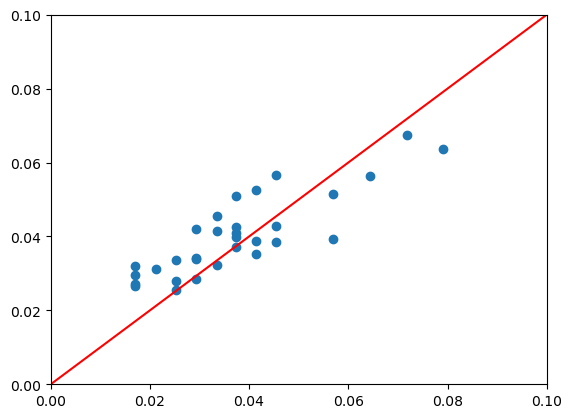

In [19]:
plt.scatter(y_test, y_pred)
plt.ylim(0, .1)
plt.xlim(0, .1)
x = np.linspace(0,2,20)
y = np.linspace(0,2,20)
plt.plot(x, y, color = 'red')

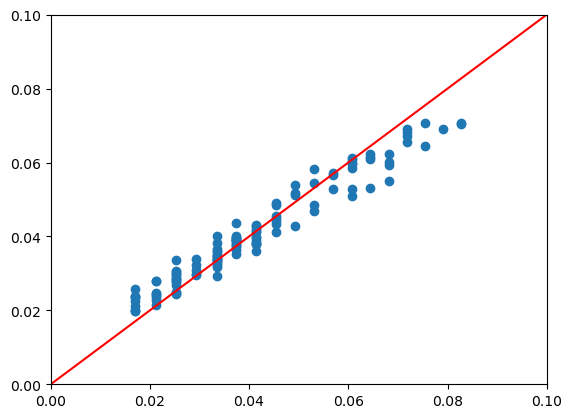

In [20]:
plt.scatter(y_train, y_pred_train)
plt.ylim(0, .1)
plt.xlim(0, .1)
x = np.linspace(0,2,20)
y = np.linspace(0,2,20)
plt.plot(x, y, color = 'red')

In [21]:
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
tree_importances = pd.Series(result.importances_mean, index=X.columns)

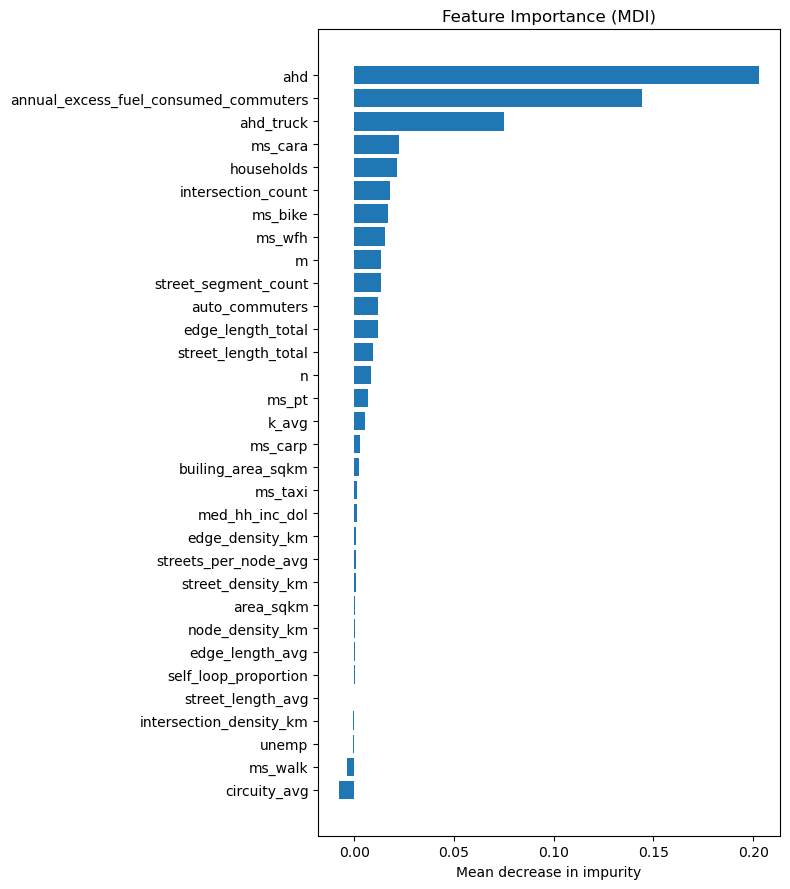

In [22]:
# sort features according to importance
sorted_idx = np.argsort(tree_importances)
pos = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(8,9))
# plot feature importances
plt.barh(pos, tree_importances[sorted_idx], align="center")

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");
plt.tight_layout()
plt.savefig('../../figures/log-tti-rf.png',dpi=300)

In [32]:
rf = RandomForestRegressor(max_features= 7, n_estimators=2000, random_state=0, max_depth = 10 ) #ccp_alpha=0.1
X = df.drop(columns=['ahd','dvmt_freeway', 'vmt_arterial'])
Y = (df['ahd'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([ 7409.63746667,  1561.05480589,  1091.54708528,  8342.920525  ,
       39111.999     ,  1556.22276623,  2422.22399795,  2139.96465152,
        1166.74905514,  1406.14728151, 11023.647     , 21314.147     ,
         873.24835265,  1342.88019696,  4448.49394396,  1647.78139619,
        1619.16944373,  1427.41744149,  2671.13702066,  8754.942875  ,
        2582.16605746,  6004.06374096,  1052.49304466,  6496.61004524,
        3014.11760973,   878.96765192,  5432.49167798,  4388.76555813,
        3019.57675477,  2039.85109838,  1779.10217071])

In [33]:
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'mse = {mse} mape = {mape} rmse = {rmse}')

mse = 3042114.991108407 mape = 0.16823388767055644 rmse = 1744.1659872582102


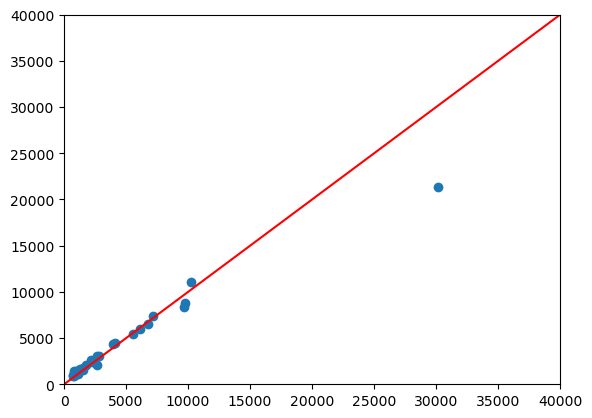

In [34]:
plt.scatter(y_test, y_pred)
plt.ylim(0,40000)
plt.xlim(0, 40000)
x = np.linspace(0,40000,20)
y = np.linspace(0,40000,20)
plt.plot(x, y, color = 'red')

In [35]:
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
tree_importances = pd.Series(result.importances_mean, index=X.columns)

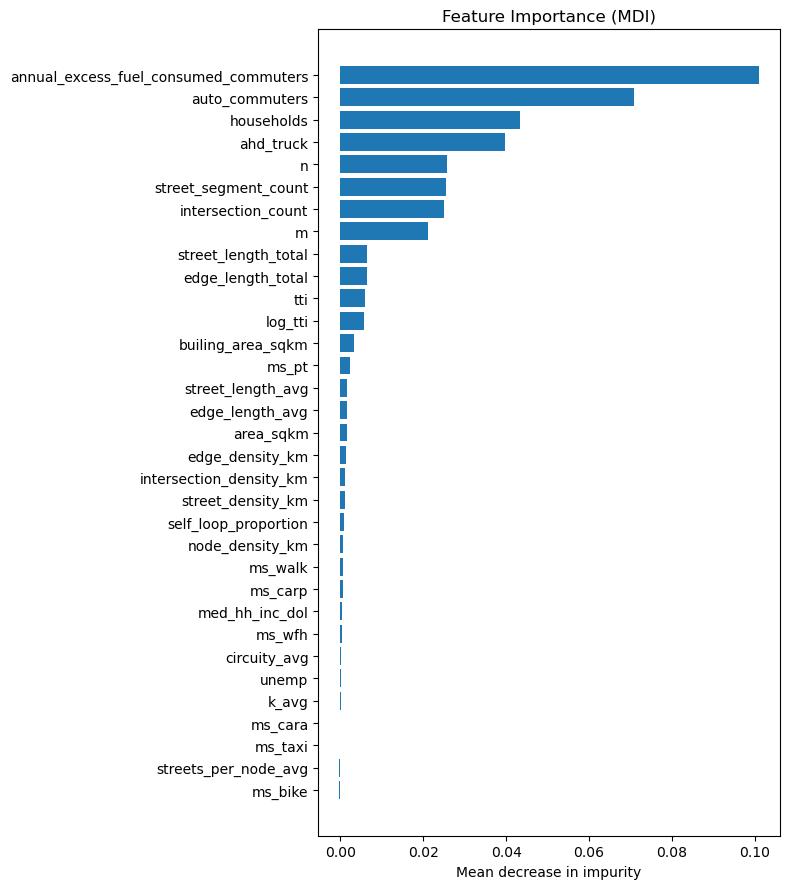

In [36]:
# sort features according to importance
sorted_idx = np.argsort(tree_importances)
pos = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(8,9))
# plot feature importances
plt.barh(pos, tree_importances[sorted_idx], align="center")

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");
plt.tight_layout()
plt.savefig('../../figures/tti-rf.png',dpi=300)